# Validate the claim of average stock return

## Objective

On other discussion we estimated a bbca stock return using normal distribution [link](https://github.com/septianusa/Stat-for-Financial-Analysis/blob/master/2.%20assess%20risk%20with%20normal%20distribution/Estimate-Risk-VaR.ipynb).
Now we will use statistical inference to estimate the real mean return of some equity funds. Claim of investment strategy can generate certain percentage return need to be validated. Here we will use confidence interval to estimate population mean for the average data return. 
Then we need to apply hypothesis testing in validating some claims about the mean return.

## Case Study

###Null hypothesis is rejected under 
### Problem statement
Is that true bbca given positive return income?

In [ ]:
# to handle dataset
import pandas as pd
import numpy as np
import datetime as dt

# to simulate the normal distribution
from scipy.stats import norm

# to crawl stock data
import pandas_datareader.data as web

#visualize the dataas plt
import matplotlib.pyplot as plt
%matplotlib inline

### 1. Munging the stock data and see the trend

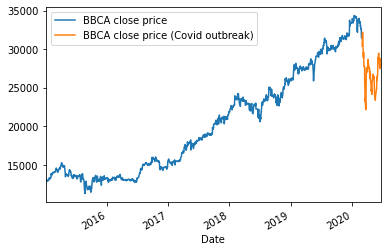

In [49]:
# load data bbca since 2015 until first day at 2020
start = dt.datetime(2015,1,1)
end = dt.datetime.now()

bbca = web.DataReader('BBCA.JK','yahoo', start,end)

#plot the trend
bbca['Close'].loc['2015-01-01':'2020-02-29'].plot(label='BBCA close price')
bbca['Close'].loc['2020-03-01':'2020-06-21'].plot(label='BBCA close price (Covid outbreak)')
plt.legend()
plt.show()

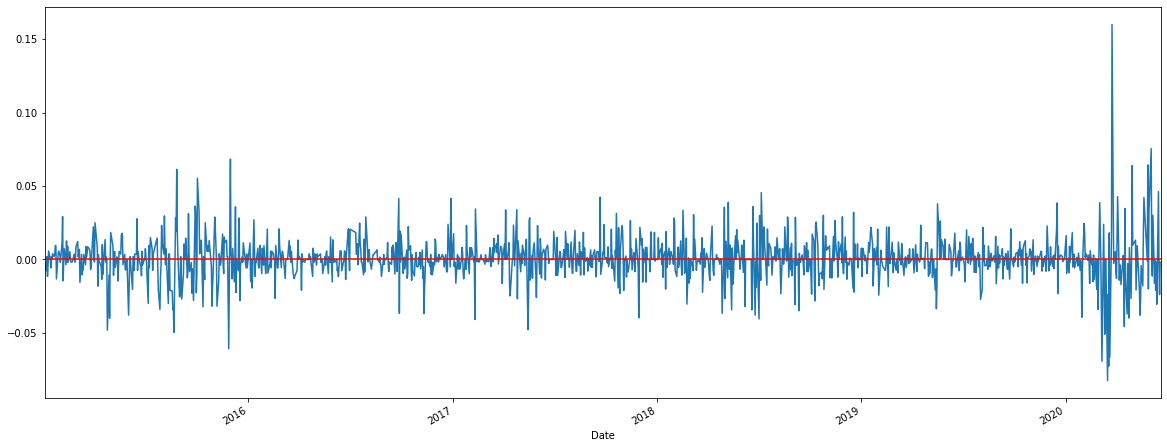

In [50]:
bbca['LogReturn'] = np.log(bbca['Close']).shift(-1) - np.log(bbca['Close'])
bbca['LogReturn'].plot(figsize=(20,8))
plt.axhline(0,color='red')
plt.show()

### 2. Estimate the average stock return with 80% Confidence Interval

In [55]:
# build 80% confidence interval for log return of BBCA
sample_size = bbca['LogReturn'].shape[0]
sample_mean = bbca['LogReturn'].mean()
sample_std = bbca['LogReturn'].std(ddof=1)/sample_size**0.5

# values for calculating 80% confidence interval
# left and right quantile
z_left = norm.ppf(0.1)
z_right = norm.ppf(0.9)

# upper and lower bound
lower_bound = sample_mean + z_left * sample_std
upper_bound = sample_mean + z_right * sample_std

print('Mean stock return is ', sample_mean)
print('80% confidence interval is ', (lower_bound, upper_bound))

Mean stock return is  0.0005414823907305149
80% confidence interval is  (3.426940568408124e-05, 0.0010486953757769487)


Average return of bbca is positive (trend) with value = 0.05%. Notice,confidence interval on both side is positive. It implies that the average return is very likely to be positive. 

When doing analysis of stock return you notice that with 90% confidence interval, both lower_bound and upper_bound negative. There is 90% of which the mean return of this stock are negative.

NB:
In standard statistical practice, ddof=1 provides an unbiased estimator of the variance of the infinite population. ddof =1 means we set degrees of freedom to **n-1**. The degree of freedom in sample variance is constrained by the sample mean. 

### 3. Validate the claim of average stock return 

#### Set hypothesis (two-tailed side)
$H_0 : \mu = 0$ 
$H_a : \mu \neq 0$

H0 means the average stock return is 0
H1 means the average stock return is not equal to 0

In [56]:
#calculate test statistic
# mu = 0
zhat = (sample_mean - 0)/(sample_std/sample_size**0.5)
print(zhat)

50.787246630472964


Due to sample size n is large enough, we can use z-distribution. According central limit theorem, the distribution of sample mean follows normal distribution with very large sample size  follows normal distribution regardless of the population distribution.

#### Make decision - shall we reject H0

In [58]:
# confidence level
alpha =0.05
lower_bound = norm.ppf(alpha/2,0,1)
upper_bound = -lower_bound

print('At significant level of {}, is HO rejected: {}'.format(alpha, zhat>upper_bound or zhat<lower_bound))

At significant level of 0.05, is HO rejected: True


#### Now try for one tail test

#### Set hypothesis

$H_0 : \mu \leq 0$ 
$H_a : \mu > 0$

In [60]:
zright = norm.ppf(1-alpha,0,1)
print ('At significant level of {}, is HO rejected: {}'.format(alpha, zhat>zright))

At significant level of 0.05, is HO rejected: True


#### An alternative method: p-value

In [61]:
pval = 1 - norm.cdf(zhat, 0, 1)
print('At significant level of {}, is HO rejected: {}'.format(alpha, pval < alpha))

At significant level of 0.05, is HO rejected: True


In [63]:
sample_mean

0.0005414823907305149

Null hypothesis is rejected under 5%. It means that the average daily return of a population is indeed positive. The we can make a claim that BBCA stock is has positive return.